In [2]:
import pandas as pd

In [3]:
titanic=pd.read_csv("http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt")

In [4]:
print titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
row.names    1313 non-null int64
pclass       1313 non-null object
survived     1313 non-null int64
name         1313 non-null object
age          633 non-null float64
embarked     821 non-null object
home.dest    754 non-null object
room         77 non-null object
ticket       69 non-null object
boat         347 non-null object
sex          1313 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 112.9+ KB
None


In [5]:
print titanic["embarked"].value_counts()

Southampton    573
Cherbourg      203
Queenstown      45
Name: embarked, dtype: int64


In [6]:
y=titanic["survived"]
X=titanic.drop(["row.names","name","survived"],axis=1)

In [7]:
X["age"].fillna(X["age"].mean(),inplace=True)
X.fillna("UNKOWN",inplace=True)

In [8]:
from sklearn.cross_validation import train_test_split

C:\Users\liuzhiwei\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=33)

In [10]:
from sklearn.feature_extraction import DictVectorizer

In [11]:
vec=DictVectorizer()

In [12]:
X_train=vec.fit_transform(X_train.to_dict(orient="record"))
X_test=vec.transform(X_test.to_dict(orient="record"))

In [13]:
print len(vec.feature_names_)

474


In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dt=DecisionTreeClassifier(criterion="entropy")

In [16]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [17]:
dt.score(X_test,y_test)

0.82978723404255317

In [18]:
from sklearn import feature_selection

In [19]:
fs=feature_selection.SelectPercentile(feature_selection.chi2,percentile=20)

In [20]:
X_train_fs=fs.fit_transform(X_train,y_train)

In [21]:
dt.fit(X_train_fs,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [22]:
X_test_fs=fs.transform(X_test)

In [23]:
dt.score(X_test_fs,y_test)

0.82674772036474165

In [24]:
from sklearn.cross_validation import cross_val_score
import numpy as np

In [25]:
percentiles=range(1,100,2)
results=[]

In [26]:
for i in percentiles:
    fs=feature_selection.SelectPercentile(feature_selection.chi2,percentile=i)
    X_train_fs=fs.fit_transform(X_train,y_train)
    scores=cross_val_score(dt,X_train_fs,y_train,cv=5)
    results=np.append(results,scores.mean())
print results

[ 0.85063904  0.85673057  0.87501546  0.88622964  0.86590394  0.87201608
  0.87202639  0.86997526  0.86996496  0.86794475  0.86793445  0.86996496
  0.86794475  0.86082251  0.86183261  0.86689342  0.86691404  0.86082251
  0.86384251  0.86485261  0.86690373  0.86384251  0.86997526  0.86592455
  0.86692435  0.86486291  0.87202639  0.86794475  0.86794475  0.86793445
  0.86895485  0.86691404  0.86790353  0.87302618  0.87606679  0.86792414
  0.86995465  0.87198516  0.87505669  0.875067    0.87300557  0.86790353
  0.86591424  0.86692435  0.86388374  0.86183261  0.86287363  0.86487322
  0.8597918   0.85572047]


In [27]:
np.where(results==results.max())[0]

array([3], dtype=int64)

In [28]:
import pylab as pl

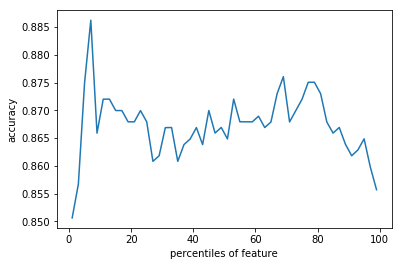

In [29]:
pl.plot(percentiles,results)
pl.xlabel("percentiles of feature")
pl.ylabel("accuracy")
pl.show()

In [30]:
from sklearn import feature_selection

In [32]:
fs=feature_selection.SelectPercentile(feature_selection.chi2,percentile=7)
X_train_fs=fs.fit_transform(X_train,y_train)
dt.fit(X_train_fs,y_train)
X_test_fs=fs.transform(X_test)
dt.score(X_test_fs,y_test)

0.8571428571428571